In [177]:
import pandas as pd

Handling Inconsistent Data

1 . Finding Unique Values in Payment_method and Employees_status

In [178]:
fulldata = pd.read_csv('online_store_customer_data.csv')

In [179]:
Payment_method_unique_values = fulldata['Payment_method'].value_counts()
Payment_method_unique_values

Payment_method
PayPal    1168
Card       749
Other      595
Name: count, dtype: int64

In [180]:
Employees_status = fulldata['Employees_status'].value_counts()
Employees_status

Employees_status
Employees        946
workers          798
self-employed    487
Unemployment     255
Name: count, dtype: int64

Dropping rows where employees status is Unemployed and their payment method is other

In [181]:
# Getting these rows

rows_to_drop = fulldata[(fulldata['Employees_status'] == 'Unemployment') & (fulldata['Payment_method'] == 'Other')].index
rows_to_drop

Index([   0,   38,   72,  102,  105,  109,  112,  127,  131,  168,  178,  202,
        245,  282,  326,  352,  406,  416,  556,  642,  654,  655,  724,  893,
        930,  931,  945,  994, 1023, 1089, 1107, 1149, 1241, 1252, 1312, 1324,
       1330, 1348, 1493, 1506, 1567, 1588, 1589, 1615, 1616, 1653, 1726, 1803,
       1838, 1867, 2004, 2021, 2086, 2120, 2228, 2287, 2323, 2371],
      dtype='int64')

In [182]:
fulldata = fulldata.drop(rows_to_drop)
fulldata

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
1,1/1/2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
2,1/1/2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
3,1/1/2019,151203,NaN,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.79
4,1/1/2019,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,NaN
5,1/3/2019,151205,Male,71.0,Single,Hawaii,Basic,Employees,PayPal,1.0,2922.66
...,...,...,...,...,...,...,...,...,...,...,...
2507,5/1/2021,153695,Female,57.0,Single,South Carolina,Platinum,self-employed,Card,0.0,150.10
2508,5/1/2021,153696,Female,36.0,Married,Hawaii,Silver,self-employed,PayPal,1.0,708.88
2509,5/1/2021,153697,Male,22.0,Single,South Carolina,Basic,workers,PayPal,1.0,2030.07
2510,5/1/2021,153698,NaN,44.0,Single,New York,Basic,Employees,PayPal,0.0,1909.77


In [183]:
# Resetting the rows index

fulldata.reset_index(drop=True, inplace=True)

Encoding

1. Replace Method

In [184]:
# Getting Unique Values in the Gender Column

fulldata['Gender'].value_counts()

Gender
Female    1330
Male      1097
Name: count, dtype: int64

In [185]:
fulldata['Gender'] = fulldata['Gender'].replace({'Female' : 0, 'Male' : 1})
fulldata

/var/folders/yl/hc0wg3cd5577fyq8rq7spkx00000gn/T/ipykernel_47795/2922115622.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fulldata['Gender'] = fulldata['Gender'].replace({'Female' : 0, 'Male' : 1})


,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,1/1/2019,151201,1.0,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
1,1/1/2019,151202,1.0,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
2,1/1/2019,151203,NaN,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.79
3,1/1/2019,151204,1.0,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,NaN
4,1/3/2019,151205,1.0,71.0,Single,Hawaii,Basic,Employees,PayPal,1.0,2922.66
...,...,...,...,...,...,...,...,...,...,...,...
2449,5/1/2021,153695,0.0,57.0,Single,South Carolina,Platinum,self-employed,Card,0.0,150.10
2450,5/1/2021,153696,0.0,36.0,Married,Hawaii,Silver,self-employed,PayPal,1.0,708.88
2451,5/1/2021,153697,1.0,22.0,Single,South Carolina,Basic,workers,PayPal,1.0,2030.07
2452,5/1/2021,153698,NaN,44.0,Single,New York,Basic,Employees,PayPal,0.0,1909.77


In [186]:
# Replacing Categorical Data Marital Status

fulldata['Marital_status'].value_counts()

Marital_status
Married    1432
Single     1022
Name: count, dtype: int64

In [187]:
fulldata['Marital_status'] = fulldata['Marital_status'].replace({'Married' : 0, 'Single' : 1})
fulldata

/var/folders/yl/hc0wg3cd5577fyq8rq7spkx00000gn/T/ipykernel_47795/278208728.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fulldata['Marital_status'] = fulldata['Marital_status'].replace({'Married' : 0, 'Single' : 1})


,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,1/1/2019,151201,1.0,49.0,1,Illinois,Basic,self-employed,Card,0.0,544.04
1,1/1/2019,151202,1.0,63.0,0,New Mexico,Basic,workers,PayPal,1.0,1572.60
2,1/1/2019,151203,NaN,18.0,1,Virginia,Platinum,workers,Card,1.0,1199.79
3,1/1/2019,151204,1.0,27.0,1,Connecticut,Basic,self-employed,Card,0.0,NaN
4,1/3/2019,151205,1.0,71.0,1,Hawaii,Basic,Employees,PayPal,1.0,2922.66
...,...,...,...,...,...,...,...,...,...,...,...
2449,5/1/2021,153695,0.0,57.0,1,South Carolina,Platinum,self-employed,Card,0.0,150.10
2450,5/1/2021,153696,0.0,36.0,0,Hawaii,Silver,self-employed,PayPal,1.0,708.88
2451,5/1/2021,153697,1.0,22.0,1,South Carolina,Basic,workers,PayPal,1.0,2030.07
2452,5/1/2021,153698,NaN,44.0,1,New York,Basic,Employees,PayPal,0.0,1909.77


In [188]:
# Replacing Categorical Data Employees Status

fulldata['Employees_status'].value_counts()

Employees_status
Employees        946
workers          798
self-employed    487
Unemployment     197
Name: count, dtype: int64

In [189]:
fulldata['Employees_status'] = fulldata['Employees_status'].replace({'Employees' : 0, 'workers' : 1, 'self-employed' : 2, 'Unemployment' : 3})
fulldata

/var/folders/yl/hc0wg3cd5577fyq8rq7spkx00000gn/T/ipykernel_47795/3938787544.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fulldata['Employees_status'] = fulldata['Employees_status'].replace({'Employees' : 0, 'workers' : 1, 'self-employed' : 2, 'Unemployment' : 3})


,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,1/1/2019,151201,1.0,49.0,1,Illinois,Basic,2.0,Card,0.0,544.04
1,1/1/2019,151202,1.0,63.0,0,New Mexico,Basic,1.0,PayPal,1.0,1572.60
2,1/1/2019,151203,NaN,18.0,1,Virginia,Platinum,1.0,Card,1.0,1199.79
3,1/1/2019,151204,1.0,27.0,1,Connecticut,Basic,2.0,Card,0.0,NaN
4,1/3/2019,151205,1.0,71.0,1,Hawaii,Basic,0.0,PayPal,1.0,2922.66
...,...,...,...,...,...,...,...,...,...,...,...
2449,5/1/2021,153695,0.0,57.0,1,South Carolina,Platinum,2.0,Card,0.0,150.10
2450,5/1/2021,153696,0.0,36.0,0,Hawaii,Silver,2.0,PayPal,1.0,708.88
2451,5/1/2021,153697,1.0,22.0,1,South Carolina,Basic,1.0,PayPal,1.0,2030.07
2452,5/1/2021,153698,NaN,44.0,1,New York,Basic,0.0,PayPal,0.0,1909.77


In [190]:
# Replacing Categorical Data Payment Method

fulldata['Payment_method'].value_counts()

Payment_method
PayPal    1168
Card       749
Other      537
Name: count, dtype: int64

In [191]:
fulldata['Payment_method'] = fulldata['Payment_method'].replace({'PayPal' : 0, 'Card' : 1, 'Other' : 2})
fulldata

/var/folders/yl/hc0wg3cd5577fyq8rq7spkx00000gn/T/ipykernel_47795/753350295.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  fulldata['Payment_method'] = fulldata['Payment_method'].replace({'PayPal' : 0, 'Card' : 1, 'Other' : 2})


,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,1/1/2019,151201,1.0,49.0,1,Illinois,Basic,2.0,1,0.0,544.04
1,1/1/2019,151202,1.0,63.0,0,New Mexico,Basic,1.0,0,1.0,1572.60
2,1/1/2019,151203,NaN,18.0,1,Virginia,Platinum,1.0,1,1.0,1199.79
3,1/1/2019,151204,1.0,27.0,1,Connecticut,Basic,2.0,1,0.0,NaN
4,1/3/2019,151205,1.0,71.0,1,Hawaii,Basic,0.0,0,1.0,2922.66
...,...,...,...,...,...,...,...,...,...,...,...
2449,5/1/2021,153695,0.0,57.0,1,South Carolina,Platinum,2.0,1,0.0,150.10
2450,5/1/2021,153696,0.0,36.0,0,Hawaii,Silver,2.0,0,1.0,708.88
2451,5/1/2021,153697,1.0,22.0,1,South Carolina,Basic,1.0,0,1.0,2030.07
2452,5/1/2021,153698,NaN,44.0,1,New York,Basic,0.0,0,0.0,1909.77


2. Encoding Using Cat.Codes implemented in Pandas Library

In [192]:
# Convert categorical data to numerical data using cat.codes
fulldata['State_names'] = fulldata['State_names'].astype('category') # convert the column into category
fulldata['State_names'] = fulldata['State_names'].cat.codes # Cat.Codes Function
fulldata

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,1/1/2019,151201,1.0,49.0,1,12,Basic,2.0,1,0.0,544.04
1,1/1/2019,151202,1.0,63.0,0,30,Basic,1.0,0,1.0,1572.60
2,1/1/2019,151203,NaN,18.0,1,45,Platinum,1.0,1,1.0,1199.79
3,1/1/2019,151204,1.0,27.0,1,6,Basic,2.0,1,0.0,NaN
4,1/3/2019,151205,1.0,71.0,1,10,Basic,0.0,0,1.0,2922.66
...,...,...,...,...,...,...,...,...,...,...,...
2449,5/1/2021,153695,0.0,57.0,1,39,Platinum,2.0,1,0.0,150.10
2450,5/1/2021,153696,0.0,36.0,0,10,Silver,2.0,0,1.0,708.88
2451,5/1/2021,153697,1.0,22.0,1,39,Basic,1.0,0,1.0,2030.07
2452,5/1/2021,153698,NaN,44.0,1,31,Basic,0.0,0,0.0,1909.77


3. Ordinal Encoding using Scikit Library

In [193]:
# from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
# oe = OrdinalEncoder()

# fulldata['State_names'] = oe.fit_transform(fulldata[['State_names']]).

# fulldata

4. One Hot Encoding
    a. Using Pandas 

In [194]:
# # Convery ordinal categorical feature to numeric using dummy encoding
# # Get one hot encoding of columns 'Segment'
# one_hot = pd.get_dummies(fulldata['Segment'])
# # Drop column 'Segment'as it is now encoded
# fulldata = fulldata.drop('Segment',axis = 1)
# # Join the encoded df
# fulldata = fulldata.join(one_hot)


In [195]:
fulldata.to_csv('fulldata.csv')

b. Using Scikit Learn

In [196]:
from sklearn.preprocessing import OneHotEncoder
# Initialize OneHotEncoder from sklearn
ohe = OneHotEncoder(sparse_output=False)
# drop='first' to avoid the dummy variable trap (optional)
# Apply OneHotEncoder to the 'Segment' column
Ohe_coded = ohe.fit_transform(fulldata[['Segment']])
# Convert the result into a DataFrame with proper column names
one_hot_df = pd.DataFrame(Ohe_coded,columns=ohe.get_feature_names_out(['Segment']))
# Drop the original 'Segment' column
fulldata = fulldata.drop('Segment', axis=1)
# Join the new one-hot encoded df back to the original
fulldata = fulldata.join(one_hot_df)

fulldata

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Employees_status,Payment_method,Referal,Amount_spent,Segment_Basic,Segment_Gold,Segment_Missing,Segment_Platinum,Segment_Silver
0,1/1/2019,151201,1.0,49.0,1,12,2.0,1,0.0,544.04,1.0,0.0,0.0,0.0,0.0
1,1/1/2019,151202,1.0,63.0,0,30,1.0,0,1.0,1572.60,1.0,0.0,0.0,0.0,0.0
2,1/1/2019,151203,NaN,18.0,1,45,1.0,1,1.0,1199.79,0.0,0.0,0.0,1.0,0.0
3,1/1/2019,151204,1.0,27.0,1,6,2.0,1,0.0,NaN,1.0,0.0,0.0,0.0,0.0
4,1/3/2019,151205,1.0,71.0,1,10,0.0,0,1.0,2922.66,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,5/1/2021,153695,0.0,57.0,1,39,2.0,1,0.0,150.10,0.0,0.0,0.0,1.0,0.0
2450,5/1/2021,153696,0.0,36.0,0,10,2.0,0,1.0,708.88,0.0,0.0,0.0,0.0,1.0
2451,5/1/2021,153697,1.0,22.0,1,39,1.0,0,1.0,2030.07,1.0,0.0,0.0,0.0,0.0
2452,5/1/2021,153698,NaN,44.0,1,31,0.0,0,0.0,1909.77,1.0,0.0,0.0,0.0,0.0


Variance, Covariance, Correlation

1. Variance

In [197]:
fulldata.var(numeric_only=True)

Transaction_ID      524244.313969
Gender                   0.247798
Age                    332.541050
Marital_status           0.243121
State_names            205.313399
Employees_status         0.914405
Payment_method           0.628924
Referal                  0.227239
Amount_spent        772731.418096
Segment_Basic            0.247943
Segment_Gold             0.087943
Segment_Missing          0.072835
Segment_Platinum         0.144580
Segment_Silver           0.156907
dtype: float64

2. Covariance

In [198]:
fulldata.cov(numeric_only=True)

,Transaction_ID,Gender,Age,Marital_status,State_names,Employees_status,Payment_method,Referal,Amount_spent,Segment_Basic,Segment_Gold,Segment_Missing,Segment_Platinum,Segment_Silver
Transaction_ID,524244.313969,-3.825458,-96.588910,-0.988110,-26.828052,-2.296455,16.210892,-2.052335,-7927.826996,-11.560780,-3.737045,2.508150,4.483497,8.306179
Gender,-3.825458,0.247798,-0.088234,-0.001411,0.014498,0.006504,-0.006164,0.010441,-4.045187,-0.000680,-0.002338,0.004623,0.001608,-0.003213
Age,-96.588910,-0.088234,332.541050,0.095246,-7.993018,-1.029767,0.238836,0.125155,-368.515774,0.229803,0.043343,0.055567,-0.151194,-0.177520
Marital_status,-0.988110,-0.001411,0.095246,0.243121,-0.217323,0.015673,-0.007832,0.001865,3.060823,-0.007144,0.001413,-0.000324,0.006083,-0.000028
State_names,-26.828052,0.014498,-7.993018,-0.217323,205.313399,0.150237,0.041116,-0.063526,231.637381,0.037075,-0.020238,-0.008011,0.060594,-0.069420
Employees_status,-2.296455,0.006504,-1.029767,0.015673,0.150237,0.914405,-0.064100,-0.003653,-12.702675,0.006755,-0.008533,-0.001579,0.011303,-0.007946
Payment_method,16.210892,-0.006164,0.238836,-0.007832,0.041116,-0.064100,0.628924,0.004994,9.150513,0.006191,0.001408,-0.000455,0.000231,-0.007375
Referal,-2.052335,0.010441,0.125155,0.001865,-0.063526,-0.003653,0.004994,0.227239,-2.873026,-0.004102,0.004135,-0.001375,0.001640,-0.000299
Amount_spent,-7927.826996,-4.045187,-368.515774,3.060823,231.637381,-12.702675,9.150513,-2.873026,772731.418096,-4.363341,-1.522810,0.578117,4.139165,1.168870
Segment_Basic,-11.560780,-0.000680,0.229803,-0.007144,0.037075,0.006755,0.006191,-0.004102,-4.363341,0.247943,-0.044190,-0.035869,-0.079504,-0.088379


3. Correlation

In [199]:
fulldata.corr(numeric_only=True)

,Transaction_ID,Gender,Age,Marital_status,State_names,Employees_status,Payment_method,Referal,Amount_spent,Segment_Basic,Segment_Gold,Segment_Missing,Segment_Platinum,Segment_Silver
Transaction_ID,1.000000,-0.010645,-0.007312,-0.002768,-0.002586,-0.003316,0.028232,-0.005911,-0.012464,-0.032066,-0.017405,0.012836,0.016285,0.028961
Gender,-0.010645,1.000000,-0.009713,-0.005746,0.002031,0.013639,-0.015604,0.044011,-0.009228,-0.002744,-0.015848,0.034403,0.008497,-0.016292
Age,-0.007312,-0.009713,1.000000,0.010589,-0.030652,-0.058960,0.016497,0.014409,-0.022907,0.025308,0.008029,0.011282,-0.021757,-0.024612
Marital_status,-0.002768,-0.005746,0.010589,1.000000,-0.030760,0.033247,-0.020029,0.007925,0.007063,-0.029096,0.009661,-0.002432,0.032444,-0.000145
State_names,-0.002586,0.002031,-0.030652,-0.030760,1.000000,0.010960,0.003618,-0.009253,0.018381,0.005196,-0.004763,-0.002072,0.011122,-0.012231
Employees_status,-0.003316,0.013639,-0.058960,0.033247,0.010960,1.000000,-0.084394,-0.008042,-0.015180,0.014190,-0.030173,-0.006105,0.031040,-0.020942
Payment_method,0.028232,-0.015604,0.016497,-0.020029,0.003618,-0.084394,1.000000,0.013252,0.013069,0.015678,0.005988,-0.002127,0.000766,-0.023477
Referal,-0.005911,0.044011,0.014409,0.007925,-0.009253,-0.008042,0.013252,1.000000,-0.006830,-0.017276,0.029051,-0.010668,0.009128,-0.001579
Amount_spent,-0.012464,-0.009228,-0.022907,0.007063,0.018381,-0.015180,0.013069,-0.006830,1.000000,-0.009958,-0.005892,0.002402,0.012444,0.003388
Segment_Basic,-0.032066,-0.002744,0.025308,-0.029096,0.005196,0.014190,0.015678,-0.017276,-0.009958,1.000000,-0.299258,-0.266919,-0.419916,-0.448078


4. Heatmap Visualisation

<Axes: >

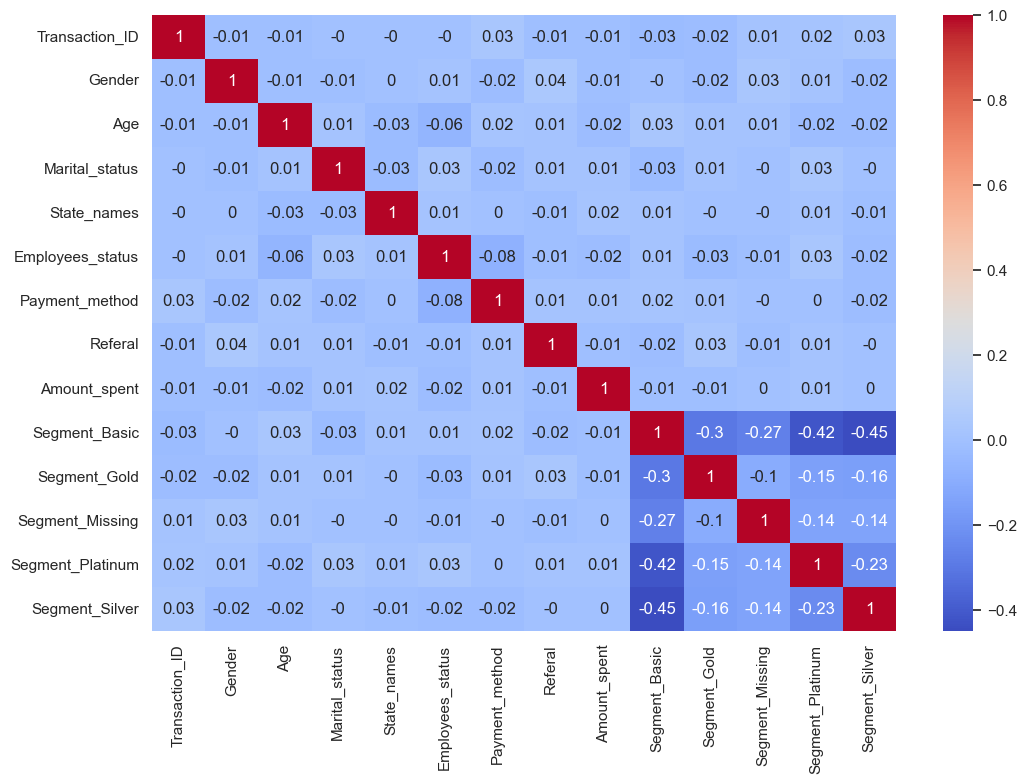

In [200]:
# visualise correlation
import seaborn as sb
corr = fulldata.corr(numeric_only=True).round(2)
sb.set (rc = {'figure.figsize':(12, 8)})
sb.heatmap(corr, cmap='coolwarm', annot=True)

Scaling

1. Min Max Scaling

In [201]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

minmax_scaler = MinMaxScaler()

fulldata_min_max = fulldata.select_dtypes(include='number')

fulldata_min_max = pd.DataFrame(minmax_scaler.fit_transform(fulldata_min_max.values),columns=fulldata_min_max.columns, index=fulldata_min_max.index)

print("Scaled Dataset Using Min Max Scaler")
fulldata_min_max

Scaled Dataset Using Min Max Scaler


,Transaction_ID,Gender,Age,Marital_status,State_names,Employees_status,Payment_method,Referal,Amount_spent,Segment_Basic,Segment_Gold,Segment_Missing,Segment_Platinum,Segment_Silver
0,0.000000,1.0,0.539683,1.0,0.244898,0.666667,0.5,0.0,0.180777,1.0,0.0,0.0,0.0,0.0
1,0.000400,1.0,0.761905,0.0,0.612245,0.333333,0.0,1.0,0.523872,1.0,0.0,0.0,0.0,0.0
2,0.000801,NaN,0.047619,1.0,0.918367,0.333333,0.5,1.0,0.399514,0.0,0.0,0.0,1.0,0.0
3,0.001201,1.0,0.190476,1.0,0.122449,0.666667,0.5,0.0,NaN,1.0,0.0,0.0,0.0,0.0
4,0.001601,1.0,0.888889,1.0,0.204082,0.000000,0.0,1.0,0.974209,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,0.998399,0.0,0.666667,1.0,0.795918,0.666667,0.5,0.0,0.049371,0.0,0.0,0.0,1.0,0.0
2450,0.998799,0.0,0.333333,0.0,0.204082,0.666667,0.0,1.0,0.235762,0.0,0.0,0.0,0.0,1.0
2451,0.999199,1.0,0.111111,1.0,0.795918,0.333333,0.0,1.0,0.676469,1.0,0.0,0.0,0.0,0.0
2452,0.999600,NaN,0.460317,1.0,0.632653,0.000000,0.0,0.0,0.636341,1.0,0.0,0.0,0.0,0.0


2. Standard Scaling

In [202]:
fulldata_standard = fulldata.select_dtypes(include='number')

std_scaler = StandardScaler()

fulldata_standard = pd.DataFrame(std_scaler.fit_transform(fulldata_standard.values),columns=fulldata_standard.columns, index=fulldata_standard.index)
print("Scaled Dataset Using StandardScaler")
fulldata_standard


Scaled Dataset Using StandardScaler


,Transaction_ID,Gender,Age,Marital_status,State_names,Employees_status,Payment_method,Referal,Amount_spent,Segment_Basic,Segment_Gold,Segment_Missing,Segment_Platinum,Segment_Silver
0,-1.723765,1.101089,0.129504,1.183712,-0.836083,1.073974,0.324298,-1.366351,-0.995399,1.097657,-0.328482,-0.292986,-0.460924,-0.491836
1,-1.722383,1.101089,0.897388,-0.844800,0.420388,0.028002,-0.936918,0.731876,0.174944,1.097657,-0.328482,-0.292986,-0.460924,-0.491836
2,-1.721002,NaN,-1.570810,1.183712,1.467447,0.028002,0.324298,0.731876,-0.249256,-0.911031,-0.328482,-0.292986,2.169557,-0.491836
3,-1.719620,1.101089,-1.077170,1.183712,-1.254906,1.073974,0.324298,-1.366351,NaN,1.097657,-0.328482,-0.292986,-0.460924,-0.491836
4,-1.718239,1.101089,1.336179,1.183712,-0.975691,-1.017971,-0.936918,0.731876,1.711105,1.097657,-0.328482,-0.292986,-0.460924,-0.491836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,1.721464,-0.908192,0.568295,1.183712,1.048623,1.073974,0.324298,-1.366351,-1.443642,-0.911031,-0.328482,-0.292986,2.169557,-0.491836
2450,1.722846,-0.908192,-0.583531,-0.844800,-0.975691,1.073974,-0.936918,0.731876,-0.807837,-0.911031,-0.328482,-0.292986,-0.460924,2.033197
2451,1.724227,1.101089,-1.351414,1.183712,1.048623,0.028002,-0.936918,0.731876,0.695475,1.097657,-0.328482,-0.292986,-0.460924,-0.491836
2452,1.725609,NaN,-0.144740,1.183712,0.490192,-1.017971,-0.936918,-1.366351,0.558592,1.097657,-0.328482,-0.292986,-0.460924,-0.491836


Data Visualisation

1. Line Chart

In [203]:
fulldata = pd.read_csv('online_store_customer_data.csv')

<Axes: xlabel='year'>

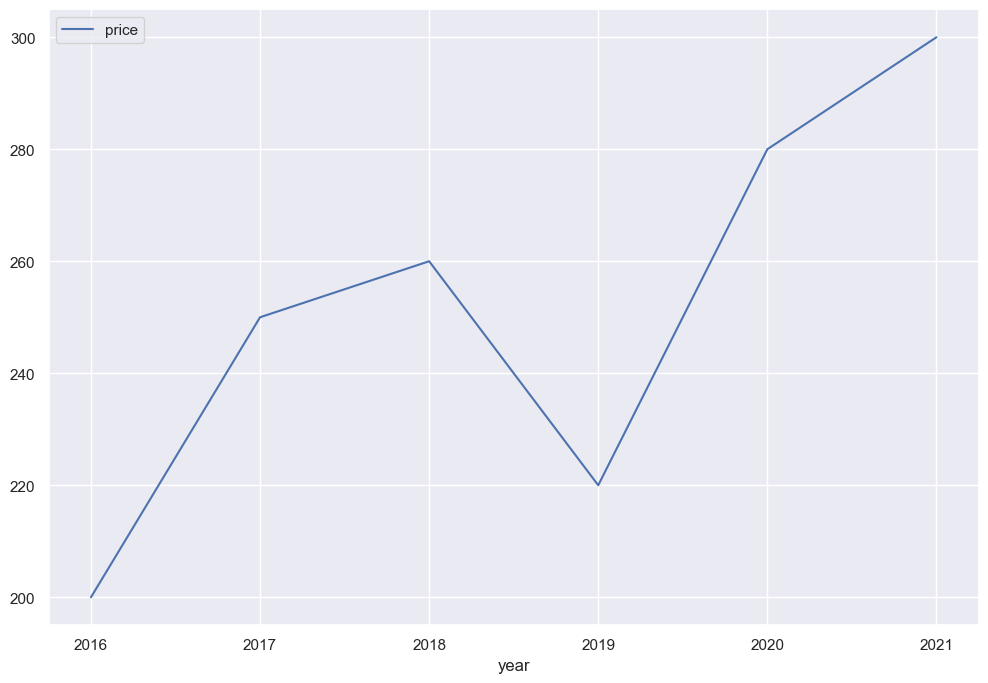

In [204]:
dict_line = {
    'year' : [2016,2017,2018,2019,2020,2021],
    'price' : [200, 250, 260, 220, 280, 300]
}

df_line = pd.DataFrame(dict_line)

# use plot() method on the dataframe

df_line.plot('year','price')

In [205]:
# Pandas method

pay_df = pd.DataFrame(fulldata[['Payment_method']].value_counts())
pay_df = pay_df.reset_index()
pay_df

,Payment_method,count
0,PayPal,1168
1,Card,749
2,Other,595


In [206]:
pay_df.columns = ['Payment_method', 'Count']
pay_df

,Payment_method,Count
0,PayPal,1168
1,Card,749
2,Other,595


<Axes: xlabel='Payment_method'>

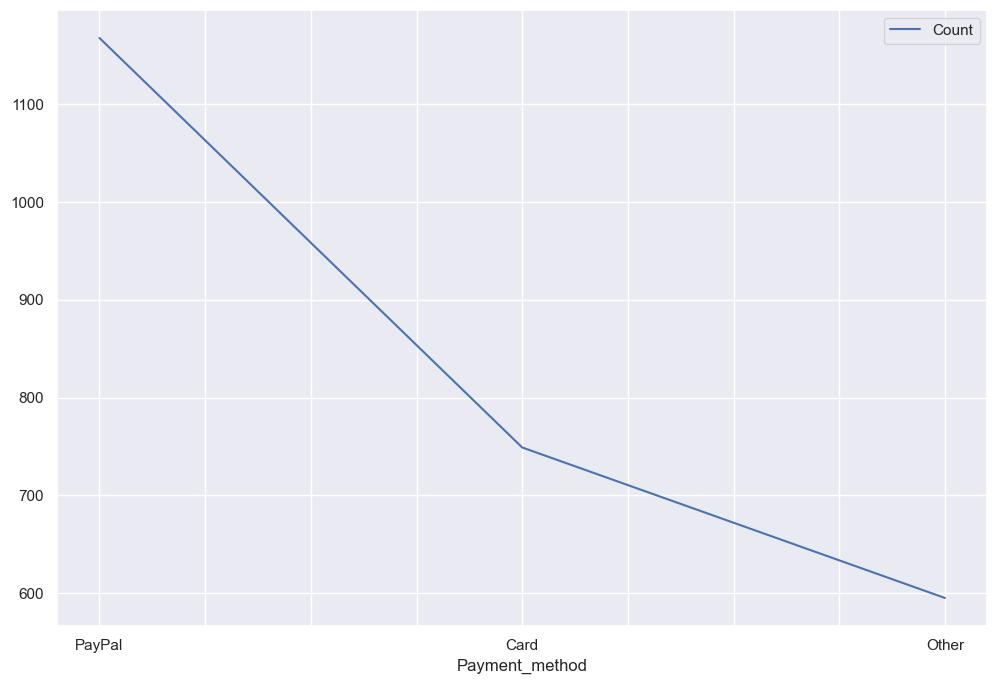

In [207]:
pay_df.plot('Payment_method', 'Count', kind='line')

<Axes: title={'center': 'Payment_method'}, xlabel='Payment_method'>

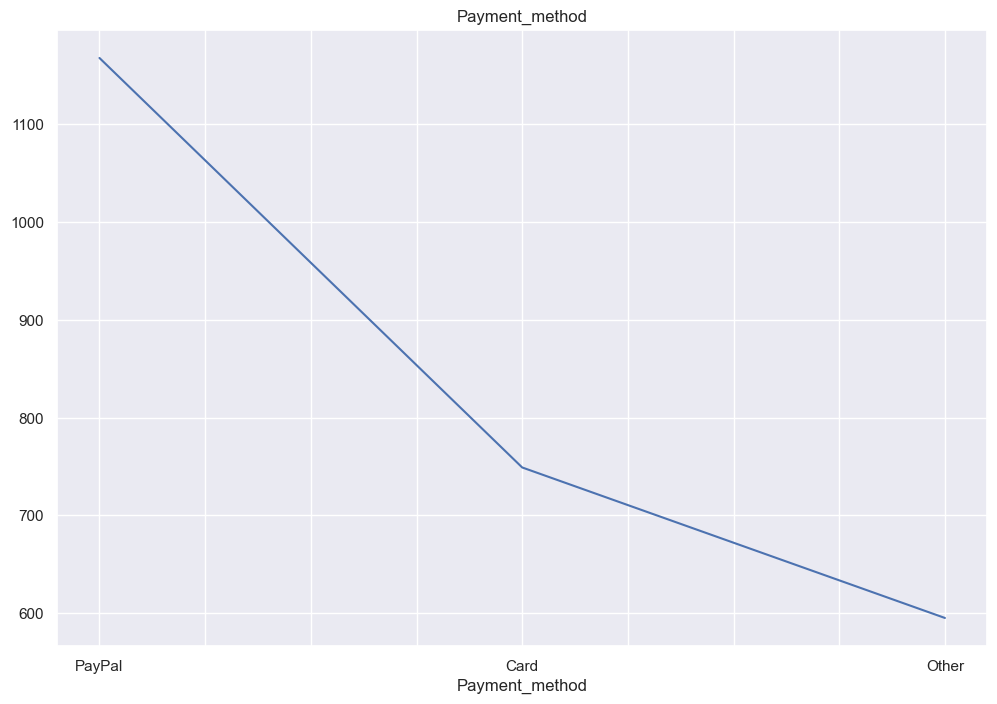

In [208]:
fulldata['Payment_method'].value_counts().plot(kind='line',title='Payment_method')

Displaying line chart of Segment Column

In [209]:
seg_df = fulldata['Segment'].value_counts().reset_index()
seg_df.columns = ['Segment', 'Count']
seg_df

,Segment,Count
0,Basic,1136
1,Silver,490
2,Platinum,443
3,Gold,247
4,Missing,196


<Axes: title={'center': 'Segments'}, xlabel='Segment'>

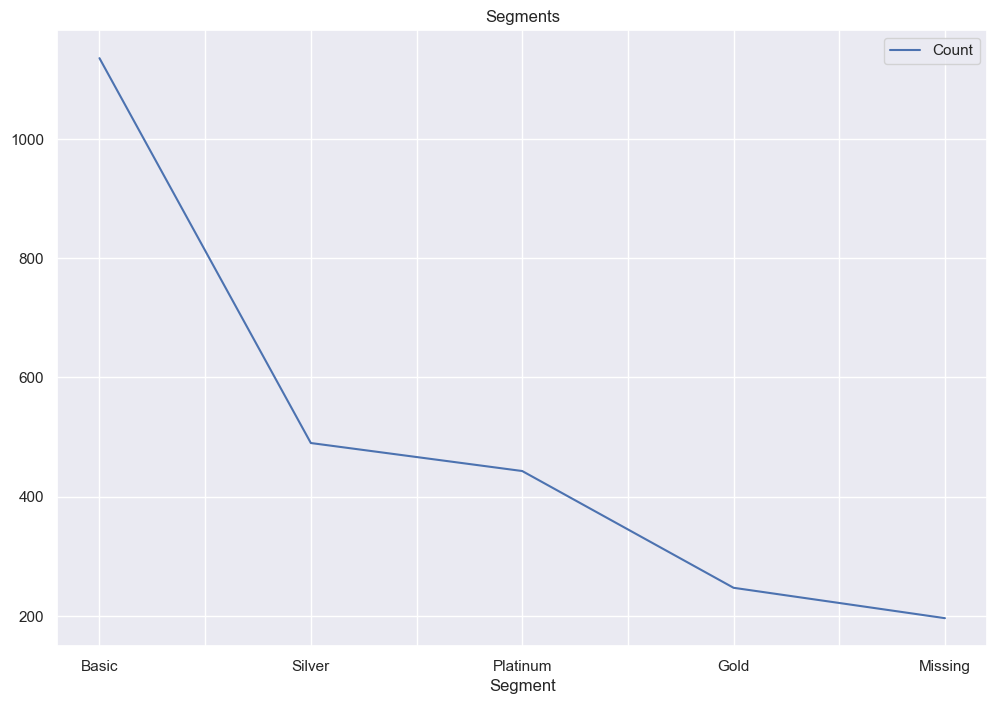

In [210]:
seg_df.plot('Segment','Count',kind='line',title='Segments')

2. Bar Plot

<Axes: xlabel='Employees_status'>

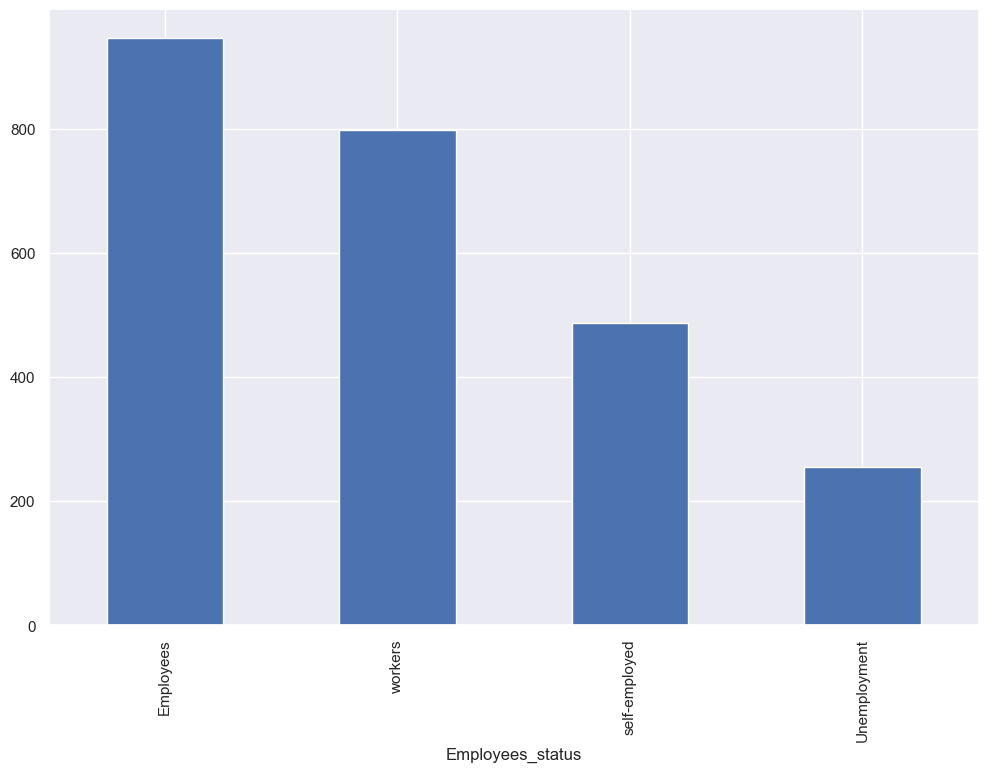

In [211]:
fulldata['Employees_status'].value_counts().plot(kind='bar')

<Axes: title={'center': 'Employees-Status'}, xlabel='Employees_status'>

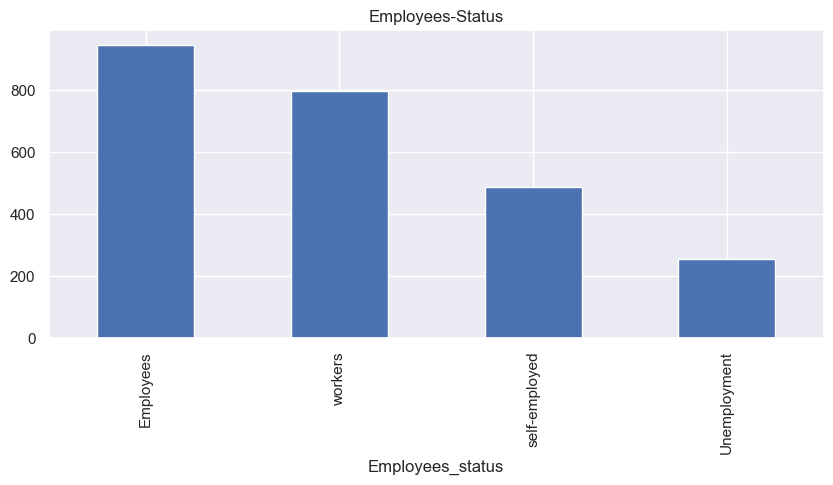

In [212]:
fulldata['Employees_status'].value_counts().plot(kind='bar',title="Employees-Status",figsize=[10,4])

Horizontal Bar chart

<Axes: ylabel='Employees_status'>

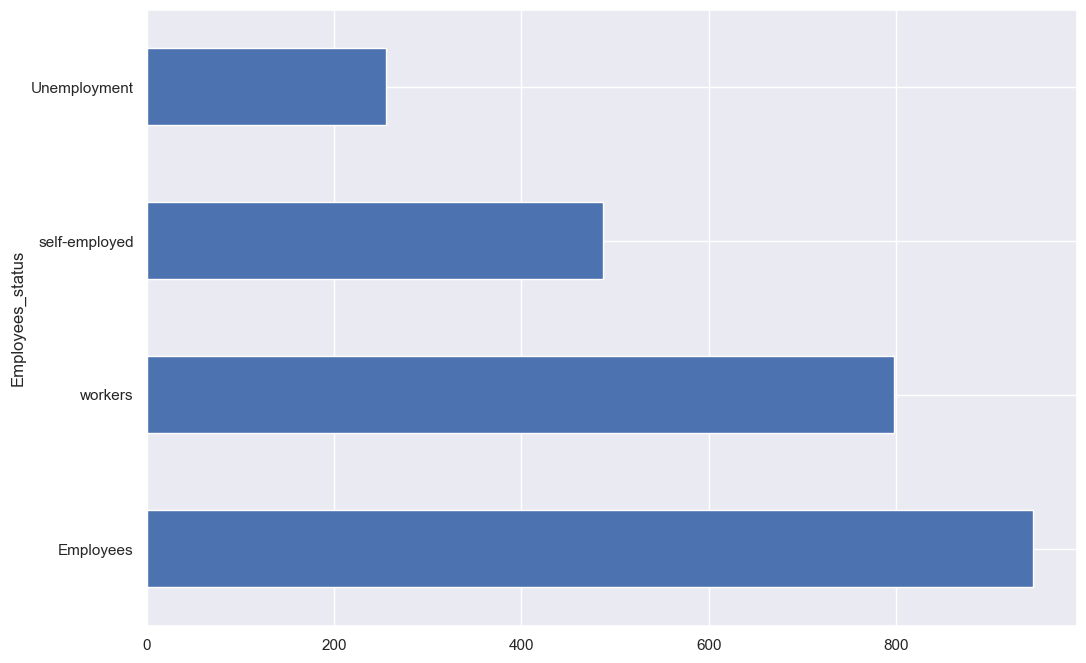

In [213]:
fulldata['Employees_status'].value_counts().plot(kind='barh')

<Axes: xlabel='State_names'>

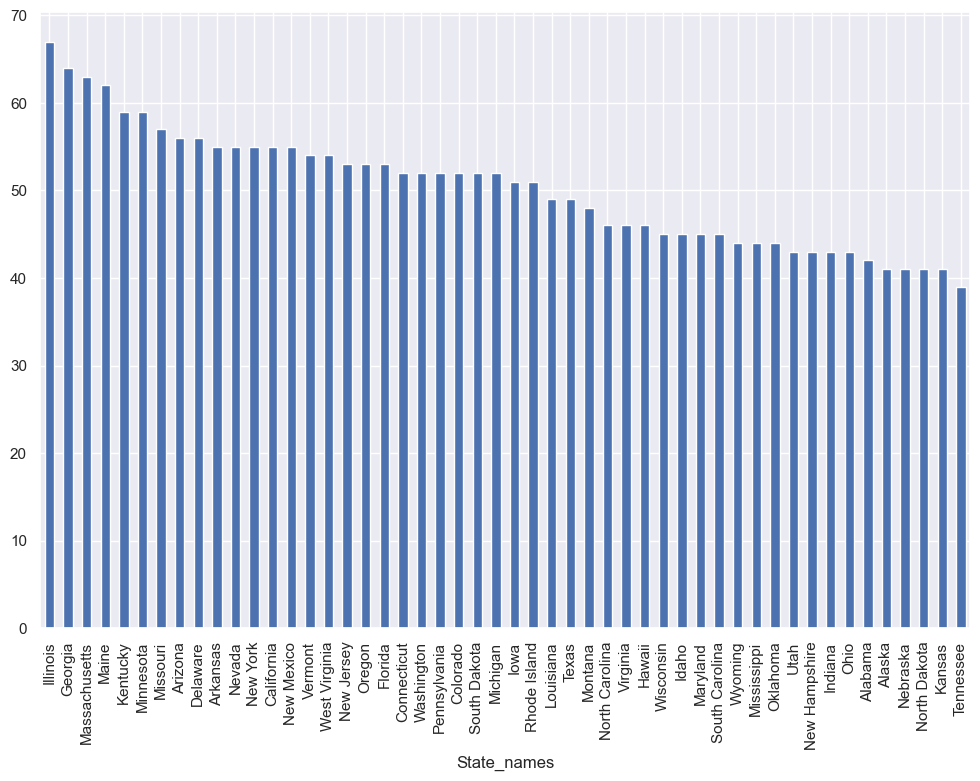

In [214]:
fulldata['State_names'].value_counts().plot(kind='bar')

3. Pie Chart

<Axes: ylabel='count'>

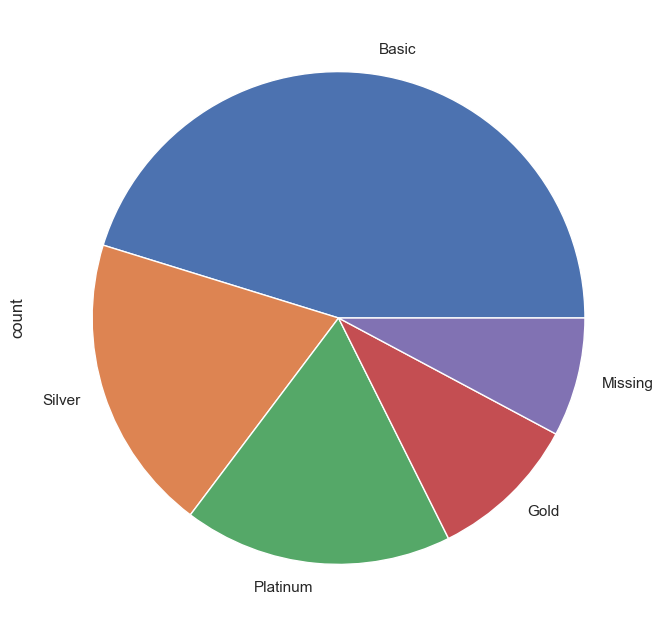

In [215]:
fulldata['Segment'].value_counts().plot(kind='pie')

<Axes: ylabel='Gender'>

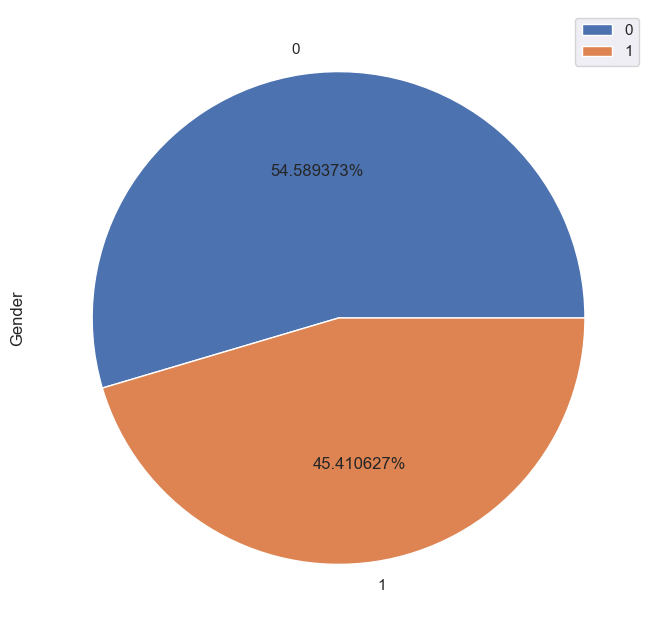

In [216]:
gender = fulldata['Gender'].value_counts().reset_index()
gender.columns = ['Count','Gender']
gender.plot('Count','Gender',kind='pie',autopct='%1.6f%%')

<Axes: ylabel='Frequency'>

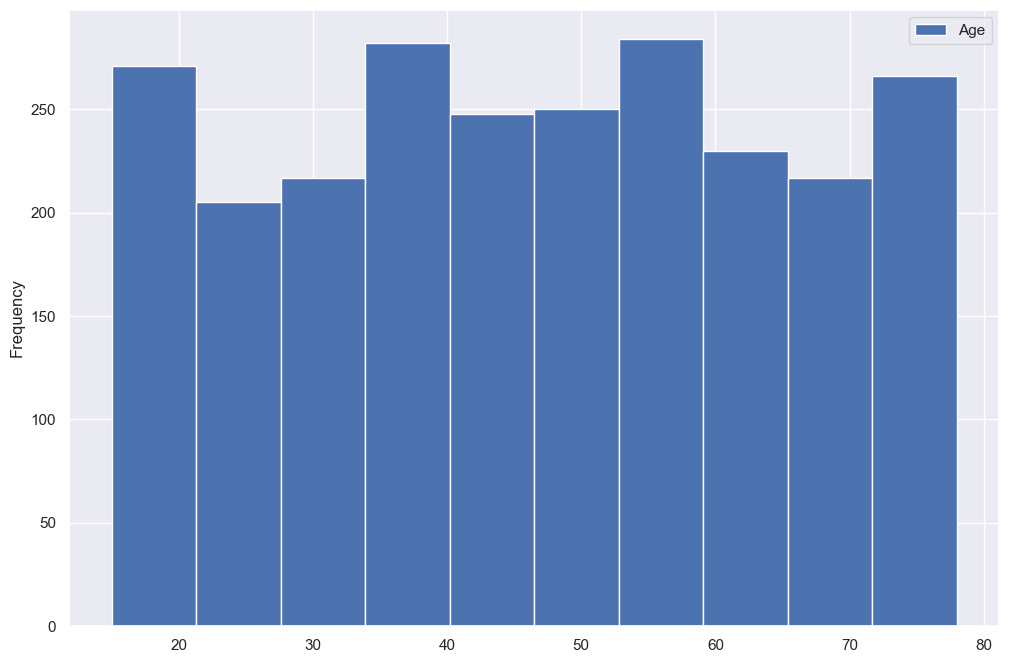

In [217]:
fulldata.plot(y='Age',kind='hist',bins=10)

4. Box Plot

<Axes: >

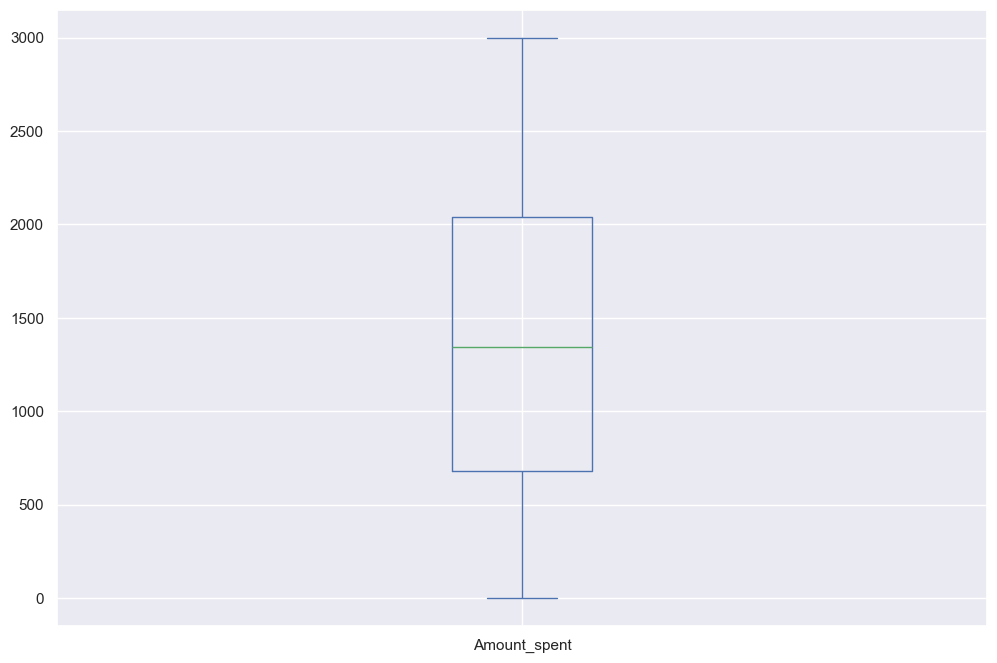

In [218]:
fulldata.plot(y=['Amount_spent'], kind='box')

In [219]:
# List of new rows to be added
new_data = [
    {'Transaction_ID': 160000, 'Gender': 'Male', 'Age': 40, 'Marital_status': 'Married', 
     'State_names': 'Hawaii', 'Segment': 'Basic', 'Employees_status': 'workers', 
     'Payment_method': 'PayPal', 'Referal': 1.0, 'Amount_spent': 4000},
    {'Transaction_ID': 160001, 'Gender': 'Male', 'Age': 40, 'Marital_status': 'Married', 
     'State_names': 'Hawaii', 'Segment': 'Basic', 'Employees_status': 'workers', 
     'Payment_method': 'PayPal', 'Referal': 1.0, 'Amount_spent': 5000},
    {'Transaction_ID': 160002, 'Gender': 'Male', 'Age': 40, 'Marital_status': 'Married', 
     'State_names': 'Hawaii', 'Segment': 'Basic', 'Employees_status': 'workers', 
     'Payment_method': 'PayPal', 'Referal': 1.0, 'Amount_spent': 6000},
    {'Transaction_ID': 160003, 'Gender': 'Male', 'Age': 40, 'Marital_status': 'Married', 
     'State_names': 'Hawaii', 'Segment': 'Basic', 'Employees_status': 'workers', 
     'Payment_method': 'PayPal', 'Referal': 1.0, 'Amount_spent': 7000},
    {'Transaction_ID': 160004, 'Gender': 'Male', 'Age': 40, 'Marital_status': 'Married', 
     'State_names': 'Hawaii', 'Segment': 'Basic', 'Employees_status': 'workers', 
     'Payment_method': 'PayPal', 'Referal': 1.0, 'Amount_spent': 8000},
    {'Transaction_ID': 160005, 'Gender': 'Male', 'Age': 40, 'Marital_status': 'Married', 
     'State_names': 'Hawaii', 'Segment': 'Basic', 'Employees_status': 'workers', 
     'Payment_method': 'PayPal', 'Referal': 1.0, 'Amount_spent': 9000}
]

# Concatenate the new data directly to the original DataFrame
fulldata = pd.concat([fulldata, pd.DataFrame(new_data)], ignore_index=True)

fulldata = fulldata._append(new_data,ignore_index= True)

# Display the updated DataFrame
fulldata


,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,1/1/2019,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
1,1/1/2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
2,1/1/2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
3,1/1/2019,151203,NaN,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.79
4,1/1/2019,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2519,NaN,160001,Male,40.0,Married,Hawaii,Basic,workers,PayPal,1.0,5000.00
2520,NaN,160002,Male,40.0,Married,Hawaii,Basic,workers,PayPal,1.0,6000.00
2521,NaN,160003,Male,40.0,Married,Hawaii,Basic,workers,PayPal,1.0,7000.00
2522,NaN,160004,Male,40.0,Married,Hawaii,Basic,workers,PayPal,1.0,8000.00


<Axes: title={'center': 'Amount_spent'}, xlabel='Employees_status'>

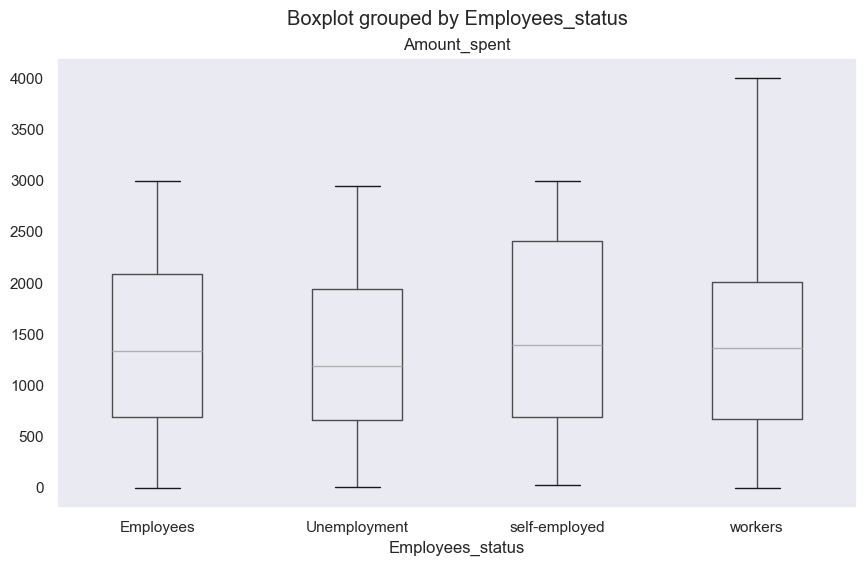

In [220]:


fulldata.boxplot(by ='Employees_status', column =['Amount_spent'],figsize=(10,6), grid =False,showfliers=False)


<Axes: title={'center': 'Age'}, xlabel='Employees_status'>

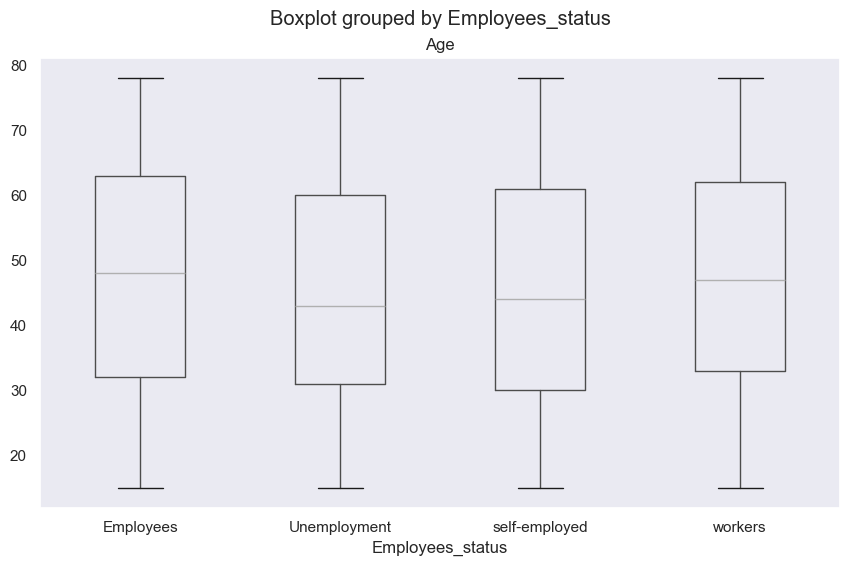

In [221]:
fulldata.boxplot(by ='Employees_status', column =['Age'],figsize=(10,6), grid =False,showfliers=False)